In [2]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
mRNA_file = "./data/mRNA/out.tsv"
clinical_file = "./data/Clinical/out.tsv"

In [4]:
t0 = time.time()
mRNA_df = pd.read_csv(mRNA_file, delimiter="\t")
print(time.time()-t0)

63.71448731422424


### Deal with Genes with Null expression values by considering:

1. drop those genes
2. replace NaN with 0s

Since genes with nulls in them have completely different histogram compared to genes without nulls in them, 
the genes with nulls are dropped

In [14]:
# First compare the histogram of genes with Null Values and the genes without

In [5]:
transposed_df = mRNA_df.set_index("gene_id").transpose()
genes_with_nulls = transposed_df.columns[transposed_df.isnull().values.any(axis=0)]
genes_without_nulls = [i for i in transposed_df.columns if i not in genes_with_nulls]

In [24]:
hist_with_nulls = transposed_df[genes_with_nulls].as_matrix().flatten()
hist_with_nulls = np.array(list(filter(lambda x: not pd.isnull(x), hist_with_nulls)))

In [25]:
print(len(hist_with_nulls))

42472332


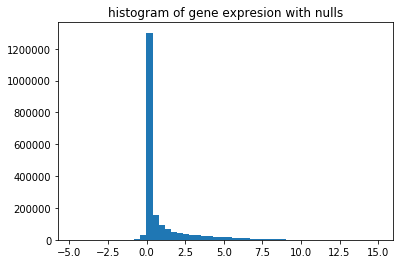

In [26]:
np.random.seed(5)
hist_with_nulls_sample = np.random.choice(hist_with_nulls, size=2000000)
hist_with_nulls_log = list(map(lambda x: np.log(x+1), hist_with_nulls_sample))
plt.hist(hist_with_nulls_log, bins=50)
plt.title("histogram of gene expresion with nulls")
plt.show()

In [19]:
def replace_with_zero(x):
    if pd.isnull(x):
        return 0
    else: return x

hist_with_nulls_replaced = hist_with_nulls = transposed_df[genes_with_nulls].as_matrix().flatten()
hist_with_nulls_replaced = np.array(list(map(replace_with_zero, hist_with_nulls_replaced)))

In [20]:
print(len(hist_with_nulls_replaced))

46445524


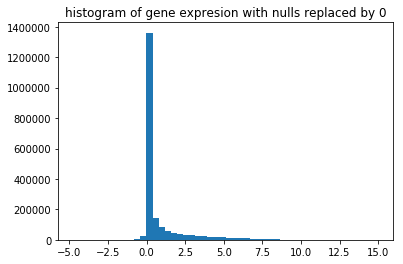

In [29]:
np.random.seed(1)
hist_with_nulls_replaced_sample = np.random.choice(hist_with_nulls_replaced, size=2000000)
hist_with_nulls_replaced_log = list(map(lambda x: np.log(x+1), hist_with_nulls_replaced_sample))
plt.hist(hist_with_nulls_replaced_log, bins=50)
plt.title("histogram of gene expresion with nulls replaced by 0")
plt.show()

In [30]:
hist_without_nulls = transposed_df[genes_without_nulls].as_matrix().flatten()

In [31]:
len(hist_without_nulls)

180812115

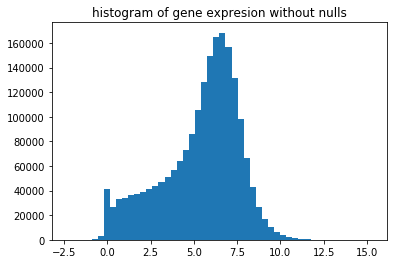

In [32]:
hist_without_nulls_sample = np.random.choice(hist_without_nulls, size=2000000)
hist_without_nulls_log = list(map(lambda x: np.log(x+1), hist_without_nulls_sample))
plt.hist(hist_without_nulls_log, bins=50)
plt.title("histogram of gene expresion without nulls")
plt.show()

### Drop nulls and log transformation

In [41]:
df = mRNA_df.dropna().set_index("gene_id").transpose()
df.index.name = "sample_id"

In [49]:
log_df = df.applymap(lambda x:np.log(x+1))

In [51]:
sample = np.random.choice(log_df.as_matrix().flatten(), size=1000000)

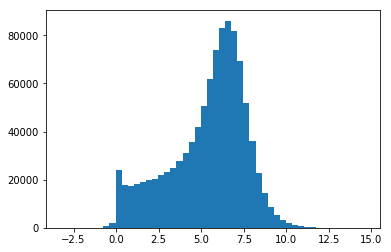

In [52]:
plt.hist(sample, bins=50)
plt.show()

In [ ]:
log_df.to_csv("./data/mRNA_cleaned.csv")